iris数据集的中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set。iris包含150个样本，对应数据集的每行数据。每行数据包含每个样本的四个特征和样本的类别信息，所以iris数据集是一个150行5列的二维表。通俗地说，iris数据集是用来给花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征（前4列），我们需要建立一个分类器，分类器可以通过样本的四个特征来判断样本属于山鸢尾、变色鸢尾还是维吉尼亚鸢尾（这三个名词都是花的品种


未经标准化的原始数据点分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data
Y = iris.target

X = X [Y<2,:2] # 只取y<2的类别，也就是0 1 并且只取前两个特征
Y = Y[Y<2] # 只取y<2的类别

# 分别画出类别 0 和 1 的点
plt.scatter(X[Y==0,0],X[Y==0,1],color='red')
plt.scatter(X[Y==1,0],X[Y==1,1],color='blue')
plt.show()


<Figure size 640x480 with 1 Axes>

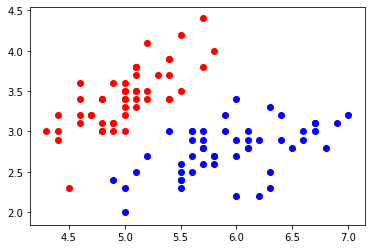

In [2]:
plt.scatter(X[Y==0,0],X[Y==0,1],color='red')
plt.scatter(X[Y==1,0],X[Y==1,1],color='blue')
plt.show()

In [3]:
# 标准化
standardScaler = StandardScaler()
standardScaler.fit(X)

# 计算训练数据的均值和方差
X_standard = standardScaler.transform(X) # 再用 scaler 中的均值和方差来转换 X ，使 X 标准化
svc = LinearSVC(C=1e9) # 线性 SVM 分类器
svc.fit(X_standard,Y) # 训练svm



LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [4]:
standardScaler = StandardScaler()
standardScaler.fit(X)
#计算训练数据的均值和方差
X_standard=standardScaler.transform(X)#再用scaler中的均值和方差来转换X,
svc=LinearSVC(C=1e9)#线性SM分类器
svc.fit(X_standard,Y)#训练sm


LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

绘制决策边界

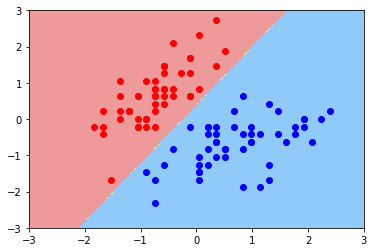

In [5]:
def plot_decision_boundary(model, axis): 
    x0, x1 = np.meshgrid( np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1), np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1) ) 
    X_new = np.c_[x0.ravel(), x1.ravel()] 
    y_predict = model.predict(X_new) 
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9']) 
    plt.contourf(x0, x1, zz, cmap=custom_cmap) # 绘制决策边界
    
plot_decision_boundary(svc,axis=[-3,3,-3,3]) # x,y轴都在-3到3之间 

# 绘制原始数据 
plt.scatter(X_standard[Y==0,0],X_standard[Y==0,1],color='red') 
plt.scatter(X_standard[Y==1,0],X_standard[Y==1,1],color='blue') 
plt.show()


C 是控制正则项的重要程度，再次实例化一个svc，并传入一个较小的 C 

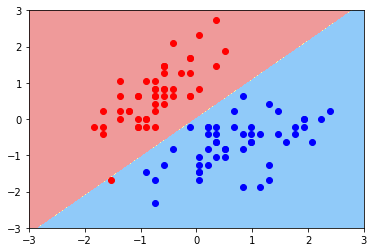

In [6]:
svc2 = LinearSVC(C=0.01) 
svc2.fit(X_standard,Y) 
plot_decision_boundary(svc2,axis=[-3,3,-3,3]) # x,y轴都在-3到3之间
# 绘制原始数据
plt.scatter(X_standard[Y==0,0],X_standard[Y==0,1],color='red') 
plt.scatter(X_standard[Y==1,0],X_standard[Y==1,1],color='blue') 
plt.show() 


1、可以很明显的看到和第一个决策边界的不同，在这个决策边界汇总，有一个红点是分类错误的；

2、CC越小容错空间越大；

3、可以通过svc.coef_获取学习到的权重系数，svc.intercept_ 获取偏差。

## 3、使用多项式特征和核函数

处理非线性数据

(100, 2)
(100,)


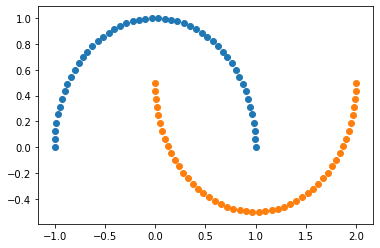

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
X,y = datasets.make_moons() #使用生成的数据 
print(X.shape) # (100,2) 
print(y.shape) # (100,)
#接下来绘制下生成的数据
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


增加一些噪声点；

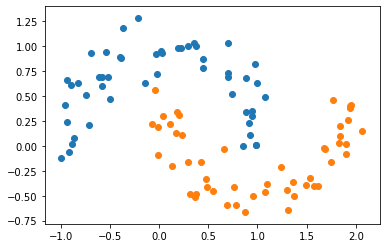

In [8]:
X, y = datasets.make_moons(noise=0.15,random_state=777) #随机生成噪声点，random_state是随机种子，noise是方差 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


接下来通过多项式特征的SVM来对它进行分类

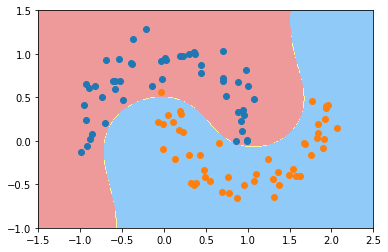

In [9]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
def PolynomialSVC(degree,C=1.0):
    return Pipeline([ ("poly",PolynomialFeatures(degree=degree)),#生成多项式
                     ("std_scaler",StandardScaler()),#标准化
                     ("linearSVC",LinearSVC(C=C))#最后生成svm
                    ])

poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X,y)
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()


使用核技巧来对数据进行处理，使其维度提升，使原本线性不可分的数据，在高维空间变成线性可分的。再用线性SVM来进行处理

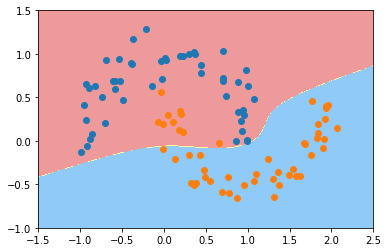

In [10]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=1.0):
    return Pipeline([ ("std_scaler",StandardScaler()),
                     ("kernelSVC",SVC(kernel="poly")) # poly代表多项式特征
                    ])
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)
plot_decision_boundary(poly_kernel_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
